In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# SVM
from sklearn.svm import LinearSVC,SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,cross_val_score

### 1. 数据处理

In [2]:
origin_data=pd.read_csv('../data/per_month_sale_and_risk.csv')

In [3]:
origin_data.head()

,Unnamed: 0,店铺ID,店铺名_x,开始时间,风险值,店铺名_y,地区名,销售额
0,0,3d8ab846-7725-11ea-98c9-525400c74cae,1+7水饺店(金科世界城店),2019-01-01,0.147242,1+7水饺店(金科世界城店),滨湖区,313.5
1,1,3d8ab846-7725-11ea-98c9-525400c74cae,1+7水饺店(金科世界城店),2019-02-01,0.187812,1+7水饺店(金科世界城店),滨湖区,376.2
2,2,3d8ab846-7725-11ea-98c9-525400c74cae,1+7水饺店(金科世界城店),2019-03-01,0.313739,1+7水饺店(金科世界城店),滨湖区,501.6
3,3,3d8ab846-7725-11ea-98c9-525400c74cae,1+7水饺店(金科世界城店),2019-04-01,0.462676,1+7水饺店(金科世界城店),滨湖区,627.0
4,4,3d8ab846-7725-11ea-98c9-525400c74cae,1+7水饺店(金科世界城店),2019-05-01,0.523725,1+7水饺店(金科世界城店),滨湖区,752.4


In [5]:
data=origin_data[['开始时间','风险值','地区名','销售额']]
data['销售额']=data['销售额'].astype(int)
data

<ipython-input-5-f58e8a647456>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['销售额']=data['销售额'].astype(int)


,开始时间,风险值,地区名,销售额
0,2019-01-01,0.147242,滨湖区,313
1,2019-02-01,0.187812,滨湖区,376
2,2019-03-01,0.313739,滨湖区,501
3,2019-04-01,0.462676,滨湖区,627
4,2019-05-01,0.523725,滨湖区,752
...,...,...,...,...
70938,2019-08-01,0.635473,梁溪区,1349
70939,2019-09-01,0.549814,梁溪区,1141
70940,2019-10-01,0.372998,梁溪区,1038
70941,2019-11-01,0.268777,梁溪区,934


In [11]:
#### 把地区名转化为数值
data_del=pd.get_dummies(data,columns=['地区名'])
#### 新建月份列
data_del['month']=data_del['开始时间'].map(lambda t:int(t.split('-')[1]))
data_del=data_del.drop('开始时间',axis=1)

In [12]:
data_del.head()

,风险值,销售额,地区名_宜兴市,地区名_新吴区,地区名_梁溪区,地区名_江阴市,地区名_滨湖区,地区名_锡山区,month
0,0.147242,313,0,0,0,0,1,0,1
1,0.187812,376,0,0,0,0,1,0,2
2,0.313739,501,0,0,0,0,1,0,3
3,0.462676,627,0,0,0,0,1,0,4
4,0.523725,752,0,0,0,0,1,0,5


### 2. KNN

In [13]:
y=data_del['风险值']
x=data_del.drop('风险值',axis=1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 

#### 设计一个函数

In [24]:
def get_best_model_and_accuracy(model, params, X, y):
    grid = GridSearchCV(model,           # 网格搜索的模型
                        params,          # 搜索的参数
                        error_score=0.)  # 如果出错 正确率是0
    grid.fit(X, y)           # 拟合模型和参数
    # 经典性能参数
    print("Best Accuracy: {}".format(grid.best_score_))
    # 最佳精度的最佳参数
    print("Best Parameters: {}".format(grid.best_params_))
    # 平均拟合数据的时间（秒）
    print("Average Time to Fit (s): {}".format(round(grid.cv_results_['mean_fit_time'].mean(), 3)))
    # 平均预测数据的时间（秒）
    # 这个参数会帮助实时分析
    print("Average Time to Score (s): {}".format(round(grid.cv_results_['mean_score_time'].mean(), 3)))

In [25]:
params = {'n_neighbors':list(range(1,20))}
standarScaler = StandardScaler()
standarScaler.fit(X_train)
X_train_std = standarScaler.transform(X_train)
X_test_std = standarScaler.transform(X_test)
knn = KNeighborsRegressor()

get_best_model_and_accuracy(knn, params, X_train_std, y_train)

Best Accuracy: 0.968331711973961
Best Parameters: {'n_neighbors': 19}
Average Time to Fit (s): 0.773
Average Time to Score (s): 0.413


In [26]:
standarScaler = StandardScaler()
standarScaler.fit(X_train)
X_train_std = standarScaler.transform(X_train)
X_test_std = standarScaler.transform(X_test)
for i in range(1,20):
    knn_clf = KNeighborsRegressor(n_neighbors=i)
    knn_clf.fit(X_train_std,y_train)
    score = knn_clf.score(X_test_std, y_test)
    print(score,i)

0.9432665652071853 1
0.9571597689196758 2
0.962021037524622 3
0.9642227576802526 4
0.9655269215534583 5
0.9664229666450779 6
0.9668451493611333 7
0.9673232693296341 8
0.9678316428597513 9
0.9683506050321075 10
0.9685534372435226 11
0.968729696703833 12
0.9689576719750594 13
0.9689579339943781 14
0.9691056818251161 15
0.9691971624202279 16
0.9692457378025523 17
0.9693362910811565 18
0.9693920347836372 19


### 3. 训练模型加预测

In [19]:
standarScaler = StandardScaler()
standarScaler.fit(X_train)
X_train_std = standarScaler.transform(X_train)
X_test_std = standarScaler.transform(X_test)
knn_model = KNeighborsRegressor(n_neighbors=12)
knn_model.fit(X_train_std,y_train)

KNeighborsRegressor(n_neighbors=12)

#### 注意此处一定要用标准化后的数据去预测

In [28]:
v=knn_model.predict(X_test_std[1:10])
v

array([0.48488441, 0.98119628, 0.93627019, 0.41533974, 0.09948398,
       0.45634006, 0.35031201, 0.98520118, 0.28367424])

In [29]:
y_test[1:10]

27348    0.439165
65964    0.976989
66835    0.994179
33675    0.398401
44534    0.136568
2967     0.474909
55236    0.336594
56307    0.986650
34953    0.252602
Name: 风险值, dtype: float64

### 4. 聚类算法

In [32]:
# 中位数
y.median()

0.4316566635422992

{'whiskers': [<matplotlib.lines.Line2D at 0x149238b26d0>,
 'caps': [<matplotlib.lines.Line2D at 0x149238b23a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x149238b21c0>],
 'medians': [<matplotlib.lines.Line2D at 0x149238294c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14923829820>],
 'means': []}

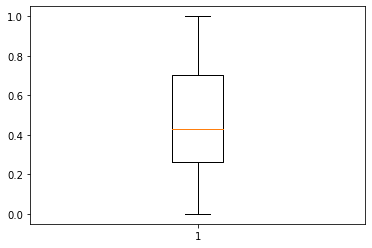

In [33]:
plt.boxplot(y)

##### 1）聚类分险值

In [33]:
from sklearn.cluster import KMeans
# 创建KMeans类对象
y=data['风险值']
kmeans = KMeans(3, 'k-means++')
# 调用fit方法
kmeans.fit(pd.DataFrame(y))
print(len(kmeans.labels_))
print(kmeans.cluster_centers_)
print(kmeans.n_clusters)
result = kmeans.predict([[0.78]])

70943
[[0.52318526]
 [0.90558604]
 [0.2312529 ]]
3


/Users/liangzhan/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass init=k-means++ as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [22]:
#获取数据
t=pd.DataFrame(y)
# 创建KMeans类对象
from sklearn.cluster import KMeans
kmeans = KMeans(3, 'k-means++')
# 调用fit方法
kmeans.fit(t)
a = t[kmeans.labels_==0]  #按照0,1,2类别过滤
b=a.sort_values(by='风险值') #排序
print("min:",b.min())
print("max:",b.max())

#查看数据
# print(t[kmeans.labels_==0])
#查看类别
print(kmeans.labels_)
#查看中心点
print(kmeans.cluster_centers_)
result = kmeans.predict([[0.78]])#预测

min: 风险值    0.714506
dtype: float64
max: 风险值    0.999998
dtype: float64
[1 1 1 ... 1 1 1]
[[0.90559716]
 [0.23138823]
 [0.52336741]]


/Users/liangzhan/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass init=k-means++ as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


##### 2) 聚类销售值

In [45]:
# 创建KMeans类对象
y=data['销售额']
from sklearn.cluster import KMeans
kmeans = KMeans(3, 'k-means++')
# 调用fit方法
kmeans.fit(pd.DataFrame(y))
print(len(kmeans.labels_))
print(kmeans.cluster_centers_)
print(kmeans.n_clusters)
result = kmeans.predict([[0.78]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass init=k-means++ as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


70943
[[ 573.75092733]
 [1679.43010546]
 [3334.70960591]]
3
